λ_0= [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
s= [1.64898332e-06 6.51533318e-06 1.19887770e-05 2.12533813e-05
 3.31567832e-05 4.76501277e-05 6.48112215e-05 8.45586979e-05
 1.06918622e-04 1.31848299e-04 3.79340379e-04 8.51232851e-04
 1.50799617e-03 2.34918568e-03 3.36839737e-03 4.57476707e-03
 5.96851797e-03 7.51877852e-03]
Mass of the DM halos at the point of PBH binary decouple =  [1.13827081e+26 4.49744610e+26 8.27569009e+26 1.46709207e+27
 2.28876775e+27 3.28922366e+27 4.47383068e+27 5.83697219e+27
 7.38044741e+27 9.10130916e+27 2.61853517e+28 5.87594488e+28
 1.04094930e+29 1.62161100e+29 2.32515900e+29 3.15789964e+29
 4.11998697e+29 5.19011080e+29]  in kg
M_DM at the point of PBH binary decouple using λ_0 = 0.009  is = 7.3804e+27 kg


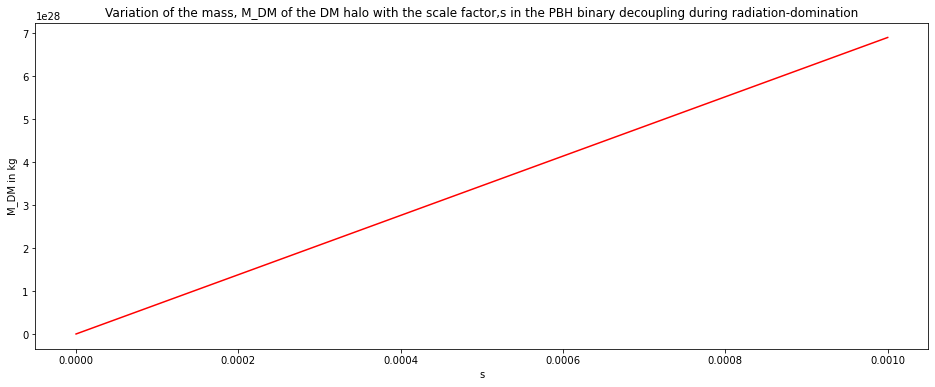

In [57]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping in the radiation dominated era using eqs.(43) & (50) in reference pdf "PBH binary".

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint
import math

π=3.14
t_eq=1.59246e12       # in units of seconds
rho_eq=2.15368e-16    # in units of kg.m^-3
G=6.67e-11            # in units of m^3.kg^-1.s^-2
M_PBH=1e32            # in kg
a_eq=2.9374e-4        # scale factor corresponding to matter radiation equlaity

def n_r(s):
    return (1+((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*(2**(3/4))*s))
def  k_r(s):
    return (1/n_r(s))
def λ_r(s):
    return λ_0*k_r(s)



λ_3_list=[0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.02,0.03,0.04,0.05,0.06,
          0.07,0.08,0.09]
for λ_0 in λ_3_list:
    def s_max(λ_0):
        def w(v,t,λ_0):
            return [v[1], ((t*v[1]-v[0])/(t**2))-((v[0]*(t**2))/(λ_r(t)*((v[0]**2+b**2)**(3/2))))] 
        separation0= [1e-12,1]
        b= 1e-6
        x0= [1e-12,1]
        ts= np.linspace(1e-12,((5*λ_0)/3),1000000) 
        vs= odeint(w,x0,ts,args=(λ_0,))
        xs= vs[:,0]
        Ts=ts/λ_0
        Xs=xs/λ_0
        χ_max=np.max(Xs)
        s_max = ts[np.argmax(Xs)]
        λ_0+=0.001
        return  s_max
    
s_max_list=np.zeros(len(λ_3_list))

for i, λ_0 in enumerate(λ_3_list):
     s_max_list[i] = (λ_0* s_max(λ_0))
print("λ_0=",λ_3_list)
print("s=",s_max_list)


def M_r(s):
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)
M_r_list=np.zeros(len(s_max_list)) 
for i, s in enumerate(s_max_list):
     M_r_list[i] = M_r(s)
print("Mass of the DM halos at the point of PBH binary decouple = ", M_r_list," in kg")

M2_r = np.vectorize(M_r) 
s=np.linspace(1e-12,1e-3,100000)

print("M_DM at the point of PBH binary decouple using λ_0 = 0.009  is =",'%.4e'%M2_r(1.06918622e-04),"kg")
# using s[8] = 1.06918622e-04 corresponding to λ_0=0.009.(just picked the value of λ_0 keep analogy with the
# reference research paper "The merger rate of primordial-black-hole binaries".)

plt.figure(figsize=(16,6))
plt.plot(s, M2_r(s),'r')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo with the scale factor,s in the PBH binary decoupling during radiation-domination')
plt.show()       

λ_0= [1.0, 1.5, 2.0, 2.5, 3.0, 3.5]
s= [0.36908424 0.85989114 1.57926016 2.543984   3.76984478 5.27171453]
Mass of the DM halos at the point of PBH binary decouple =  [2.41370248e+31 5.31800968e+31 9.17254886e+31 1.38610147e+32
 1.93039049e+32 2.54483718e+32]  in kg
M_DM at the point of PBH binary decouple using λ_0 = 1  is = 2.4137e+31 kg


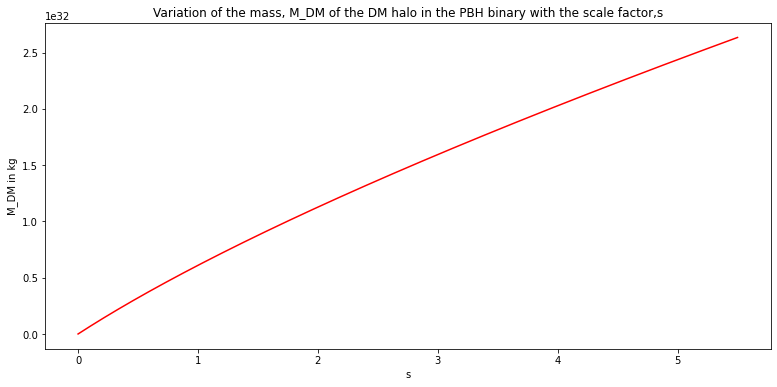

In [56]:
# Attempt to estimate the mass of the DM halos in the equal-mass PBH binary at the point of decoupling for
# PBH binary decoulping later around matter-radiation equality using eqs.(42) & (47) in reference 
# pdf "PBH binary" .



plt.figure(figsize=(13,6))


def h(x):
    return math.sqrt((x**-3)+(x**-4))
def g(x):
    return  -((3*x+4)/(2*h(x)*(x**5))) #g(x)=h'(x).
def n(s):
    return (1+(((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))+(4/3))))
def  k(s):
    return (1/n(s))

def λ(s):
    return λ_1*k(s)
   
λ_4_list=[1.0,1.5,2.0,2.5,3.0,3.5]
for λ_1 in λ_4_list:
    def s_max(λ_1):
        def j(n,p,λ_1):
            return [n[1], -((p*g(p)+h(p))*((p*n[1]-n[0]))/(h(p)*p**2))-((n[0])/((((h(p)*p)**2))*λ(p)
            *((n[0]**2+b**2)**(3/2))))]
        z0= [1e-12,1]
        b= 1e-6
        ps= np.linspace(1e-12,(6*λ_1/3),10000000) 
        ns= odeint(j,z0,ps,args=(λ_1,))
        zs= ns[:,0]
        Ps=ps/λ_1
        Zs=zs/λ_1
        χ_max=np.max(Zs)
        s_max = ps[np.argmax(Zs)]
        λ_1+=0.5
        return  s_max
        
s_max_list=np.zeros(len(λ_4_list))

for i, λ_1 in enumerate(λ_4_list):
     s_max_list[i] = (λ_1* s_max(λ_1))
print("λ_0=",λ_4_list)
print("s=",s_max_list)

def M(s):
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))
                                                                          +(4/3)))
M_list=np.zeros(len(s_max_list)) 
for i, s in enumerate(s_max_list):
     M_list[i] = M(s)
print("Mass of the DM halos at the point of PBH binary decouple = ", M_list," in kg")

M2 = np.vectorize(M) 
s=np.linspace(1e-12,5.5,100000)
print("M_DM at the point of PBH binary decouple using λ_0 = 1  is =",'%.4e'%M2(0.36908424),"kg") 
# using s[0] =0.36908424 corresponding to λ_0=1.
plt.plot(s, M2(s),'r')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo in the PBH binary with the scale factor,s')
plt.show()       

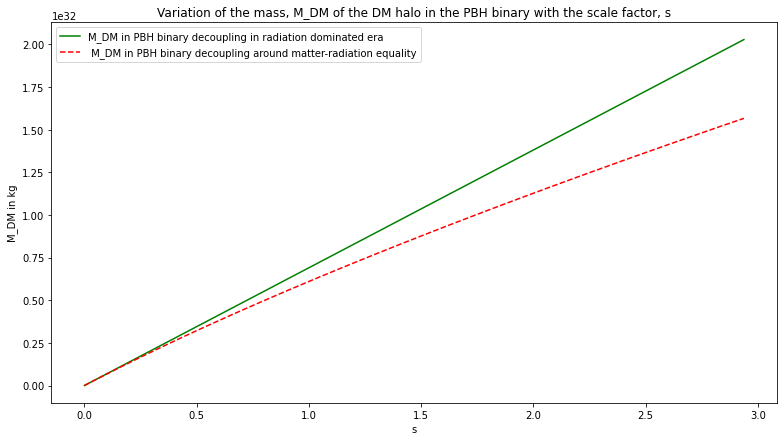

In [50]:
# Comparison of the mass, M_DM of the DM halos in equal mass PBH binary decoulping in radiation domination
# with mass, M_DM of the DM halos in equal mass PBH binary decoupling around matter-radiation equality.
def M_r(s):
    return ((((8*π*G*rho_eq*(t_eq**2))/3)**(3/4))*M_PBH*(2**(3/4))*s)

def M_(s):
    return (((8*π*G*rho_eq*(t_eq**(2)))/3)**(3/4))*(2**(5/4))*M_PBH* math.sqrt((((2/3)*(s-2)*math.sqrt(s+1))
                                                                          +(4/3)))

M2 = np.vectorize(M) 
s=np.linspace(1e-12,(1e4*a_eq),10000000)   # a_eq=2.9374e-4
plt.figure(figsize=(13,7))
plt.plot(s, M_r(s),'g')

plt.plot(s, M2(s),'r--')
plt.xlabel('s')
plt.ylabel('M_DM in kg')
plt.title('Variation of the mass, M_DM of the DM halo in the PBH binary with the scale factor, s')
plt.legend(["M_DM in PBH binary decoupling in radiation dominated era"," M_DM in PBH binary decoupling around matter-radiation equality"])
plt.show()